In [199]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from keras.preprocessing.text import Tokenizer
import re
from nltk.stem import SnowballStemmer

In [216]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')
cc_types_dict = {k: v for v, k in enumerate(cc_types)}

upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train_no_charade.csv")
val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")
test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")

tokenizer = Tokenizer(filters='"#$%&()*+/:;<=>?@[\]^_`{|}~')#exclude ! . , -
tokenizer.fit_on_texts(pd.concat([upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df])['clue'])

def addSpaceBeforePunct(s):
    s = re.sub('([.,!?()])', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train_no_charade.csv")
val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")
test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")

input_bow = tokenizer.texts_to_matrix(upsampled_input_cc_types_df['clue'])

inputs_X = tokenizer.texts_to_matrix(upsampled_input_cc_types_df['clue'])
val_X = tokenizer.texts_to_matrix(val_cc_types_df['clue'])
test_X = tokenizer.texts_to_matrix(test_cc_types_df['clue'])

inputs_Y = [cc_types_dict[val] for val in upsampled_input_cc_types_df['category'].values]
val_Y = [cc_types_dict[val] for val in val_cc_types_df['category'].values]
test_Y = [cc_types_dict[val] for val in test_cc_types_df['category'].values]


In [218]:
import pickle
with open('dt.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [220]:
content.score(inputs_X,inputs_Y)

0.9999179633022506

In [221]:
content.score(val_X,val_Y)

0.5028465202741954

In [222]:
content.score(test_X,test_Y)

0.4909680407596109

In [223]:
val_pred = content.predict(val_X)

In [224]:
cnf_matrix = confusion_matrix(val_Y,val_pred)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1244   36   12   93  419  133    6    5  390   25   45    0    3]
 [  41  223    0    4   10    0    1    0   15    0   85    0    0]
 [  45    2    1    5   14    3    2    0   16    0   12    0    0]
 [ 280    6    1   53  144   26    2    2   54    1    6    0    0]
 [  82    0    0   30 1487   14    0    7    9    0    8    0    0]
 [  51    7    1    4   57  369    0    1  144    0   80    0    0]
 [   0    0    0    0    0    0  129    0    0    0    0    0    0]
 [  13   51    0    2    9    5    2   75   22    1    1    0    0]
 [ 400    0  159    1  240  304  112  122  476    0  115    0    0]
 [   9    2    0    3    4    4    0    1    6    3    1    0    0]
 [ 142    1    1    8   29   19    0    0   36    4  247    1    0]
 [   1    0    0    0    0    0    0    0    1    0    0   20    0]
 [   3    1    0    0    1    3    0    0    0    0    0    0    1]]
Normalized

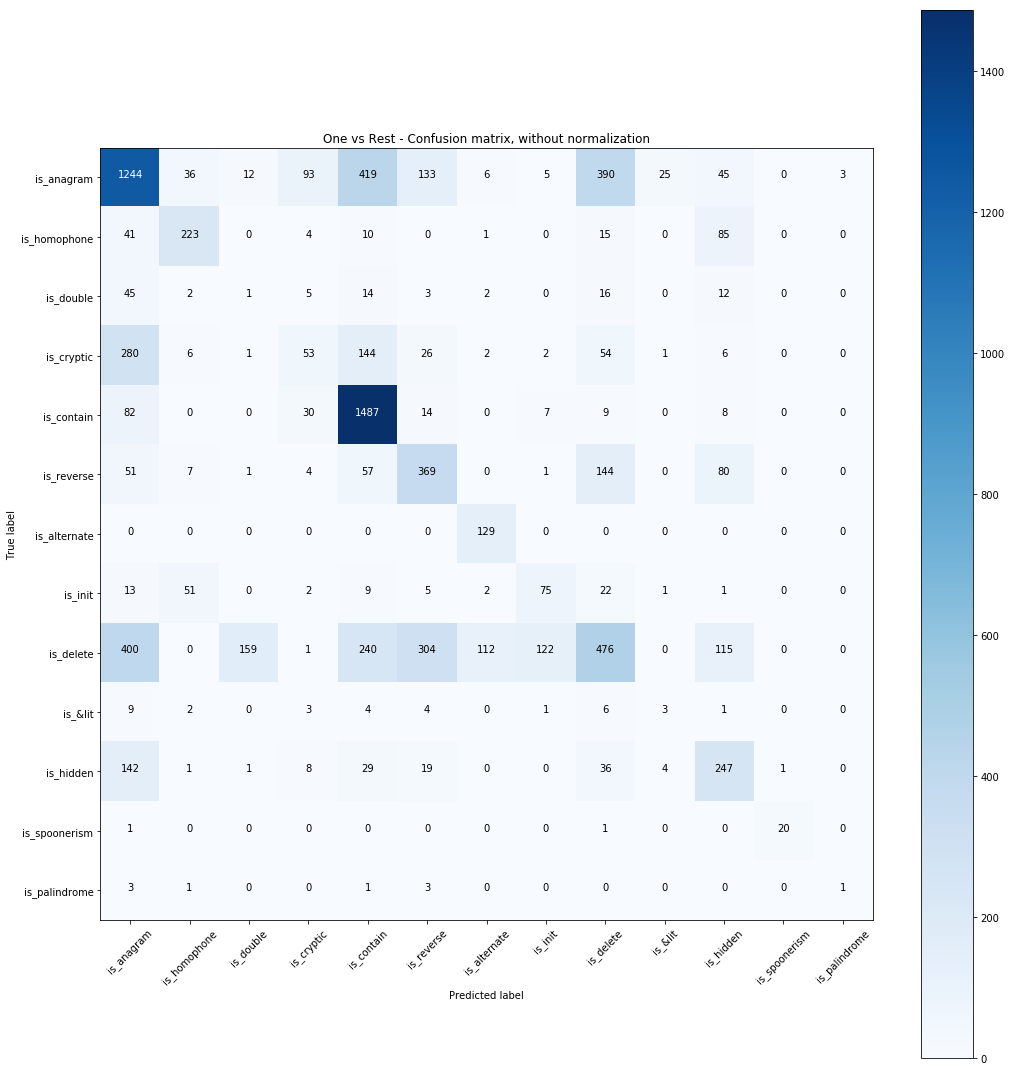

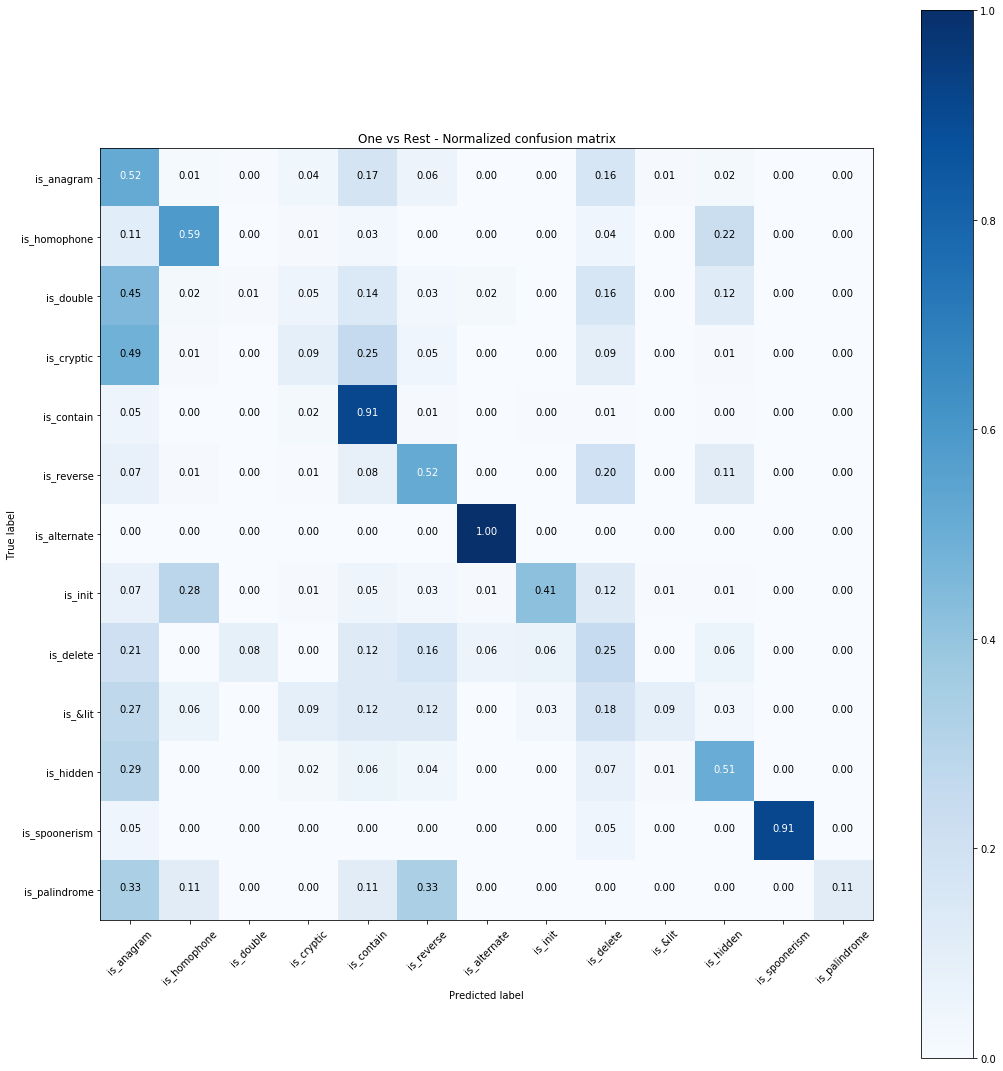

In [227]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

matplotlib.matplotlib_fname()

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='One vs Rest - Confusion matrix, without normalization')

plt.savefig("dt_unnormalized")
# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='One vs Rest - Normalized confusion matrix')

plt.savefig("dt_normalized")

In [228]:
paths = content.decision_path(val_X)

In [229]:
path = paths[0]

In [251]:
content.

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [215]:
content.score(val_X,val_Y)

ValueError: Number of features of the model must match the input. Model n_features is 29673 and input n_features is 25667 

In [55]:
content.score(inputs_X,inputs_Y)

0.18678356986899564